# **ABC 팔레토분석 실습**
아래 그래프는 최근 3년간 SKU별 출고금액 기여도를 분석한 파레토 차트이다.
- A등급: 누적 기여도 80%까지 → 핵심 전략 품목, 고정밀 예측 및 서비스 보장 필요(안전재고 정책 강화)
- B등급: 누적 80~95% → 표준 예측(통계기반 예측) 및 정기 보충(Periodic Replenishment) 적용
- C등급: 누적 95% 초과 → 비용 중심 운영 또는 EOL 품목 분류 고려(불필요한 재고 감축)
http://www.iexceller.com/MyXls/Excel_2007/abc_analysis.asp


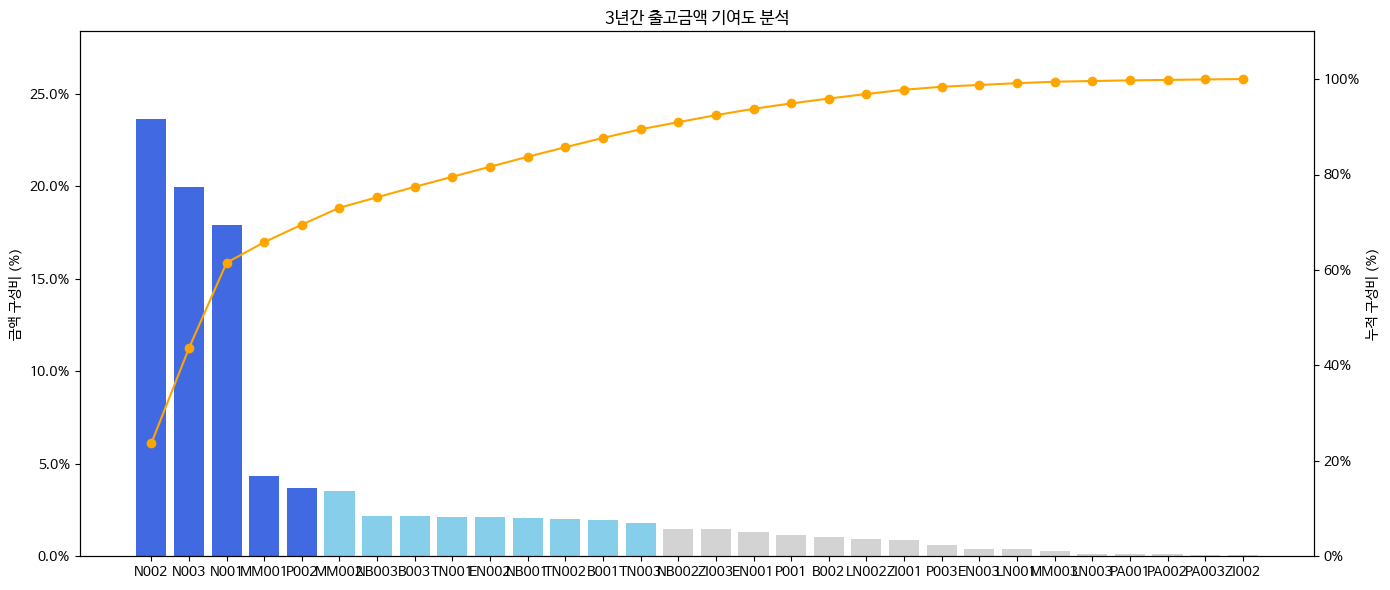

,모델,출고금액(RAW),금액(표시),금액구성비,누적구성비,ABC그룹
0,N002,94799346,"94,799,346",23.6%,23.6%,A
1,N003,79966390,"79,966,390",19.9%,43.6%,A
2,N001,71795776,"71,795,776",17.9%,61.5%,A
3,MM001,17333734,"17,333,734",4.3%,65.8%,A
4,P002,14748000,"14,748,000",3.7%,69.5%,A
5,MM002,14180916,"14,180,916",3.5%,73.0%,B
6,NB003,8777504,"8,777,504",2.2%,75.2%,B
7,B003,8765442,"8,765,442",2.2%,77.4%,B
8,TN001,8484352,"8,484,352",2.1%,79.5%,B
9,EN002,8407400,"8,407,400",2.1%,81.6%,B


In [2]:
# 📌 1. 기본 패키지 임포트
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from IPython.display import display

# 📌 2. 경로 설정
excel_path = "/content/sample_data/전체분포_3년출고.xlsx"
font_path = "/content/sample_data/NanumBarunGothic.ttf"  # Colab에 직접 업로드 필요

# 📌 3. 한글 폰트 설정
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 📌 4. 엑셀 데이터 불러오기
df = pd.read_excel(excel_path, sheet_name='Sheet1')

# 📌 5. 모델별 출고금액 합계 계산
grouped_df = df.groupby("MODEL", as_index=False)["GI_AMT"].sum()
grouped_df = grouped_df.sort_values(by="GI_AMT", ascending=False).reset_index(drop=True)

# 📌 6. 구성비 및 누적 구성비 계산
grouped_df["금액구성비"] = grouped_df["GI_AMT"] / grouped_df["GI_AMT"].sum() * 100
grouped_df["누적구성비"] = grouped_df["금액구성비"].cumsum()

# 📌 7. ABC 그룹 분류 함수 및 적용
def classify_abc(cum_pct):
    if cum_pct <= 70:
        return 'A'
    elif cum_pct <= 90:
        return 'B'
    else:
        return 'C'

grouped_df["ABC그룹"] = grouped_df["누적구성비"].apply(classify_abc)

# 📌 8. 시각화: 팔레토 차트
fig, ax1 = plt.subplots(figsize=(14, 6))

# 색상 설정
color_map = {'A': 'royalblue', 'B': 'skyblue', 'C': 'lightgrey'}
bar_colors = grouped_df["ABC그룹"].map(color_map)

# 막대 그래프 (구성비)
ax1.bar(grouped_df["MODEL"], grouped_df["금액구성비"], color=bar_colors)
ax1.set_ylabel("금액 구성비 (%)")
ax1.set_ylim(0, max(grouped_df["금액구성비"]) * 1.2)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

# 꺾은선 그래프 (누적 구성비)
ax2 = ax1.twinx()
ax2.plot(grouped_df["MODEL"], grouped_df["누적구성비"], marker='o', color='orange')
ax2.set_ylabel("누적 구성비 (%)")
ax2.set_ylim(0, 110)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

# X축 설정
plt.xticks(rotation=90)

# 제목
plt.title("3년간 출고금액 기여도 분석")

# 레이아웃 정리
plt.tight_layout()
plt.show()

# 📌 9. 표 형태로 요약 출력
summary_df = grouped_df.copy()
summary_df["금액"] = summary_df["GI_AMT"].apply(lambda x: f"{x:,.0f}")
summary_df["금액구성비"] = summary_df["금액구성비"].map("{:.1f}%".format)
summary_df["누적구성비"] = summary_df["누적구성비"].map("{:.1f}%".format)

display_df = summary_df[["MODEL", "GI_AMT", "금액", "금액구성비", "누적구성비", "ABC그룹"]]
display_df.columns = ["모델", "출고금액(RAW)", "금액(표시)", "금액구성비", "누적구성비", "ABC그룹"]

# 📌 출력
display(display_df)

